We will predict employee salaries from different employee characteristics. We are going to use a simple supervised learning techniques(linear regression). We want to build a simple model to determine how well Years Worked predicts an employee’s salary.

In [33]:
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn import datasets, linear_model
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
%matplotlib inline


### Question 1

Split your data into a training and test set. Leave the test set for now. Examine the training data for missing and extreme values. Create histograms to show the distribution of the variables and a scatterplot showing the relationship between Years Worked and Salary. Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?

In [2]:
# reading into the dataset
df = pd.read_csv('salary.csv')

In [3]:
# Splitting the data into test and train 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2)
salary = train['salary'] # our y-value(dependent variable) 
yearsworked = train['yearsworked'] # our x-value(independent variable)

print(train.shape)
print(test.shape)


(411, 11)
(103, 11)


In [4]:
train

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
254,70101.78125,0,23,16,0.89,1,0,3,1,2,0
363,62276.00000,6,23,11,0.77,1,0,3,1,1,1
329,39777.00000,10,17,10,0.86,1,0,2,1,3,1
102,40512.00000,8,1,1,0.84,1,0,1,1,2,1
495,58530.00000,0,19,9,0.93,1,0,3,0,2,52
...,...,...,...,...,...,...,...,...,...,...,...
136,42537.00000,0,13,8,0.80,1,0,2,1,3,0
338,62801.00000,0,28,15,0.77,1,0,3,1,1,0
91,44678.00000,0,8,3,0.83,1,0,2,1,3,1
423,36583.00000,0,4,4,0.81,1,0,1,0,4,1


In [5]:
x = train.isnull().sum()
x

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [6]:
train['salary'] = train.fillna(train['salary'].mean())


/home/recruit/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
x1 = train.isnull().sum()
x1

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [8]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

In [9]:
train_out = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]
train_out.shape

(293, 11)

In [10]:
train_new = pd.DataFrame(train_out, columns=['salary', 'yearsworked'])
train_new

,salary,yearsworked
254,70101.78125,23
363,62276.00000,23
329,39777.00000,17
102,40512.00000,1
340,66746.00000,25
...,...,...
422,34206.00000,4
136,42537.00000,13
338,62801.00000,28
91,44678.00000,8


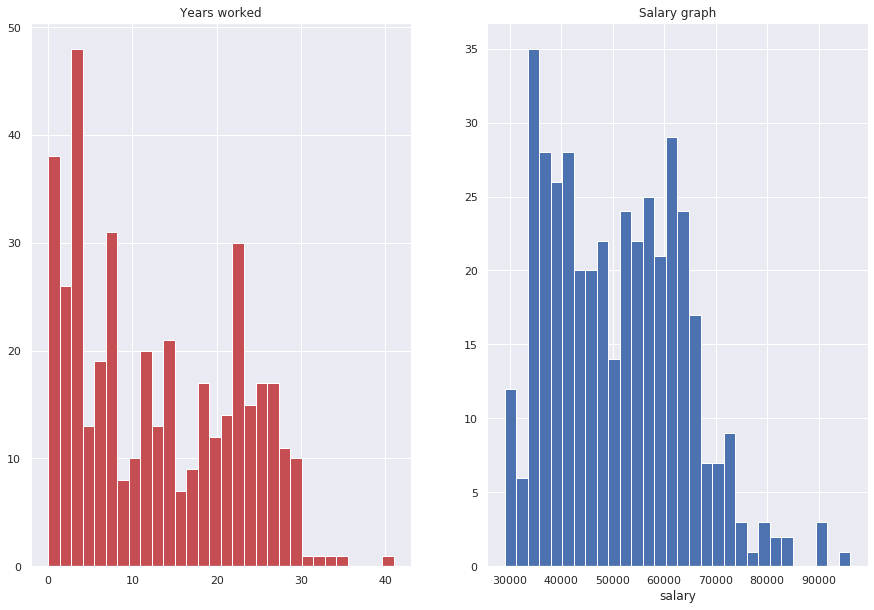

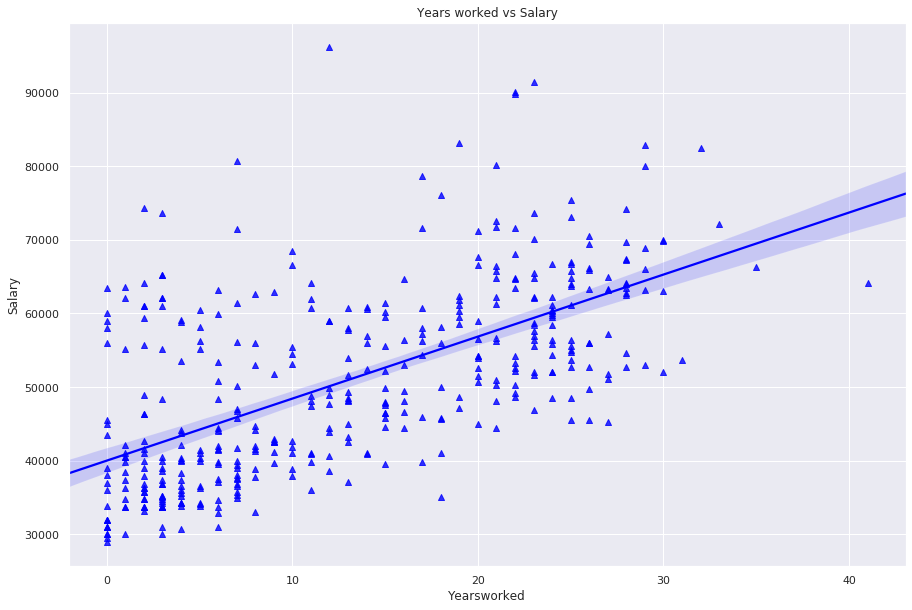

In [67]:
sns.set()
plt.subplots(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Years worked")
plt.hist(yearsworked, color='r', bins=30)
plt.xlabel("")
plt.ylabel("")

plt.subplot(1,2,2)
plt.title("Salary graph")
plt.hist(salary, bins=30, color='b')
plt.xlabel("salary")
plt.ylabel("")
# making a scatter plot 
_ = sns.set()
_ = plt.figure(figsize=(15,10))
_ = sns.regplot(yearsworked, salary, marker='^', color='blue', scatter=True, fit_reg=True, dropna=True, truncate=False)
_ = plt.xlabel('Yearsworked')
_ = plt.ylabel('Salary')
_ = plt.title('Years worked vs Salary')
_ = plt.show()

The first assumption as seen in the scatter graph above has been satisfied. The dependent & independent variabels show a linear relationship

### Question 2

In [12]:
results = smf.ols('salary ~ yearsworked', data=train_new).fit()
# Inpect Results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     329.9
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           8.20e-50
Time:                        10:03:47   Log-Likelihood:                -3072.7
No. Observations:                 293   AIC:                             6149.
Df Residuals:                     291   BIC:                             6157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.765e+04    872.000     43.182      

Using the OLS regression to show the Durbin-Watson test we can see that we have no autocorrelation, we rounded the number to 2

In [13]:
# ASSUMPTION 3: no heteroskedasticity
label = ['LM statistic', 'LM-Test p-value', 'F-statistic', 'F-test p-value']
# test for heteroskedasticity using the Breusch-Pagan Test
bp_test = het_breuschpagan(results.resid, results.model.exog)
print(dict(zip(label, bp_test)))


{'LM statistic': 0.011525942944953127, 'LM-Test p-value': 0.914504223818234, 'F-statistic': 0.011447717893249007, 'F-test p-value': 0.914867457938513}


In [14]:
label = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
jb_test = sms.jarque_bera(results.resid)
print(dict(zip(label, jb_test)))


{'Jarque-Bera': 55.533048666420164, 'Chi^2 two-tail prob.': 8.732763533480749e-13, 'Skew': 0.9578903963175615, 'Kurtosis': 3.9373185679878846}


#### 2.1 Does the model significantly predict the dependent variable?
R-square shows the total variation for the dependent variable that could be explained by the independent variables. A value greater than 0.5 shows that the model is effective enough to determine the relationship. In this case, the value is .526, which is good.
Generally, 95% confidence interval or 5% level of the significance level is chosen for the study. Thus the p-value should be less than 0.05. In the above table, the p-values are .000. Therefore, the results are statistically significant.


#### 2.2 What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?
The Adjusted R-Squared value of 0.52 indicates that the model (explanatory variable: number of years worked) explains approximately 52 percent of the variation in the dependent variable (salary).

### Question 3
What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

In [15]:
# print the coefficients
results.params

Intercept      37654.504412
yearsworked      954.918637
dtype: float64

Interpretation:
The intercept is the value of the value of the salary earned when the number of years worked is 0. Thus one unit increase in the number of years worked will result with a 915.36 unit increase in salary earned.
Note that if an increase in years worked was associated with a decrease in salary, 𝛽1
would be negative. Thus, in this case our 𝛽1 suggest a positive relationship between years worked and salary.

### Question 4
What do the 95% confidence intervals [0.025, 0.975] mean?

Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

### Question 5
Calculate the expected salary for someone with 12 years’ work experience


In [16]:
# create data frame
x_12 = pd.DataFrame({'yearsworked':[12]}, index=['Year_12 Salary:'])
# predict salary after 12 years' work experience
pred_12 = results.predict(x_12)
pred_12

Year_12 Salary:    49113.528055
dtype: float64

### Question 6
Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

In [17]:
# create data frame
x_80 = pd.DataFrame({'yearsworked':[80]}, index=['Year_80 Salary:'])
# predict salary with 80 years' work experience
pred_80 = results.predict(x_80)
pred_80

Year_80 Salary:    114047.995365
dtype: float64

### Question 7

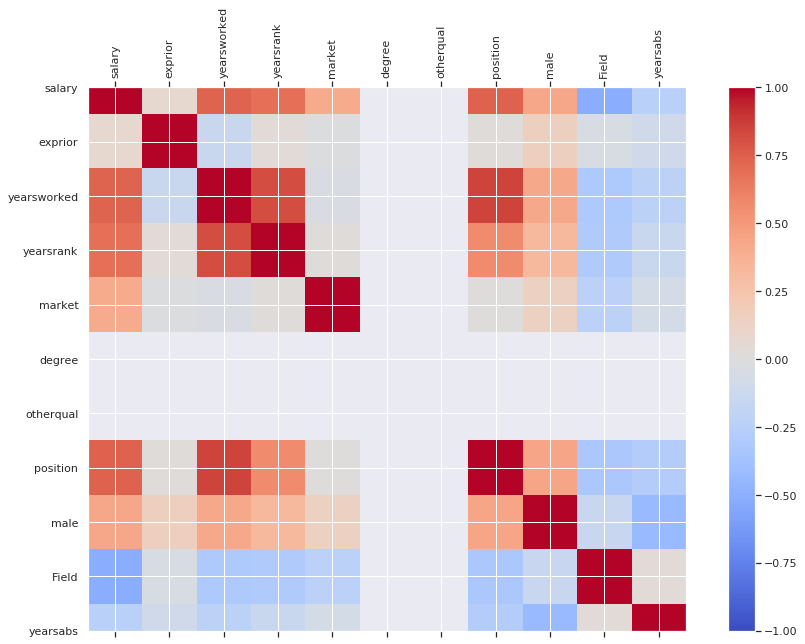

In [50]:
# plot heatmap to find correlation of multiple variables
corr = train_out.corr()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(train_out.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(train_out.columns)
ax.set_yticklabels(train_out.columns)
plt.show()

In [51]:
test_result = results.predict(test.yearsworked)
train_result = results.predict(train_out.yearsworked)

In [41]:
# calculate RMSE for Test Set
rmse_test = sqrt(mse(test.salary, test_result))
# calculate RMSE for Train Set
rmse_train = sqrt(mse(train_new.salary, train_result))
print('RMSE_Train: ', rmse_train, 'RMSE_Test: ', rmse_test)

RMSE_Train:  8674.767719582787 RMSE_Test:  9084.193616923692


The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values.
Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.
Our results indicate that the model we ran on the train set has a better fit, since it has a lower RMSE.